Import libraries

In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
proj_root = Path.cwd().resolve().parent
sys.path.insert(0, str(proj_root))

In [3]:
RAW_DATA = proj_root / "data" / "raw"
PROCESSED_DATA = proj_root / "data" / "processed"

In [4]:
train_path = RAW_DATA / "train.csv"
test_path = RAW_DATA / "test.csv"

In [5]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [6]:
df_train.shape, df_test.shape

((911, 12), (911, 11))

Get overview

In [7]:
df_train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


In [18]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,911.0,528.327113,305.072794,0.000000,266.000000,531.000000,795.500000,1049.000000
meals_served,911.0,375.405049,502.812717,100.000000,211.000000,306.000000,407.000000,4730.000000
kitchen_staff,911.0,11.900110,4.285153,5.000000,8.000000,12.000000,15.000000,19.000000
temperature_C,911.0,22.189280,8.922389,-10.372207,15.684585,22.115040,28.804294,60.000000
humidity_percent,911.0,60.761313,17.330821,30.121111,46.017835,61.633960,75.787910,89.982828
day_of_week,911.0,3.014270,2.009542,0.000000,1.000000,3.000000,5.000000,6.000000
special_event,911.0,0.085620,0.279956,0.000000,0.000000,0.000000,0.000000,1.000000
past_waste_kg,911.0,27.015691,12.774223,5.008394,16.091383,26.854109,38.149878,49.803703
food_waste_kg,911.0,44.842691,27.934366,10.819048,32.887912,41.146930,50.046681,274.328783


In [19]:
df_train.isnull().sum()

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
dtype: int64

In [20]:
df_train.duplicated().sum()

np.int64(0)

In [21]:
df_train.nunique()

ID                  911
date                867
meals_served        373
kitchen_staff        15
temperature_C       892
humidity_percent    867
day_of_week           7
special_event         2
past_waste_kg       867
staff_experience      4
waste_category        5
food_waste_kg       867
dtype: int64

Categorical Overview

In [39]:
cat_cols = df_train.select_dtypes(include= "O").columns
for col in cat_cols:
    print(f"\n{col}| unique: {df_train[col].nunique()}")
    print(df_train[col].value_counts().head(10))


date| unique: 867
date
2022-01-28    2
2022-01-13    2
2022-02-01    2
2022-01-11    2
2022-01-05    2
2022-01-30    2
2022-01-06    2
2022-01-31    2
2022-01-26    2
2022-02-11    2
Name: count, dtype: int64

staff_experience| unique: 4
staff_experience
Beginner        191
Intermediate    186
EXPERT          186
intermediate    184
Name: count, dtype: int64

waste_category| unique: 5
waste_category
MEAT          210
dairy         180
Vegetables    176
GRAINS        176
MeAt          169
Name: count, dtype: int64


min, max date: 2022-01-01 2024-09-26


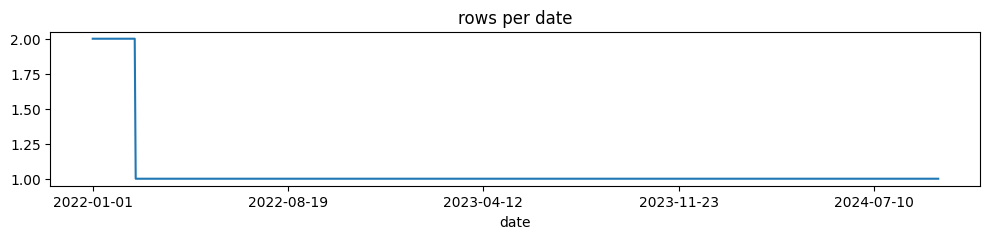

missing dates count: 1000


[Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-01-02 00:00:00'),
 Timestamp('2022-01-03 00:00:00'),
 Timestamp('2022-01-04 00:00:00'),
 Timestamp('2022-01-05 00:00:00')]

In [40]:
print("min, max date:", df_train['date'].min(), df_train['date'].max())

date_counts = df_train.groupby('date').size().sort_index()
plt.figure(figsize=(12,2)); date_counts.plot(); plt.title('rows per date'); plt.show()

# check for gaps
all_dates = pd.date_range(df_train['date'].min(), df_train['date'].max(), freq='D')
missing_dates = sorted(set(all_dates) - set(df_train['date'].dropna().unique()))
print("missing dates count:", len(missing_dates))
missing_dates[:5]


In [43]:
df_train.head(200)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
...,...,...,...,...,...,...,...,...,...,...,...,...
195,228,2022-12-22,416,13,20.771552,43.244729,3,0,21.274119,Beginner,GRAINS,40.849461
196,229,2022-12-29,116,13,21.979581,67.952647,3,0,31.464214,EXPERT,GRAINS,34.636137
197,230,2022-11-09,211,12,12.727741,65.580870,2,0,23.408832,intermediate,dairy,21.986929
198,231,2022-11-15,437,16,31.947279,62.959349,1,0,47.239917,Beginner,MEAT,64.247516


In [44]:
# Check date issues
print("Before cleaning:")
print("  Duplicated dates:", df_train['date'].duplicated().sum())
print("  Null dates:", df_train['date'].isna().sum())

# Sort and recheck order
df = df_train.sort_values('date').reset_index(drop=True)
print("  Sorted by date. Range:", df['date'].min(), "→", df['date'].max())

# Check for missing days (gaps)
all_days = pd.date_range(df['date'].min(), df['date'].max(), freq='D')
missing_days = sorted(set(all_days) - set(df['date'].unique()))
print("  Missing days:", len(missing_days))
if missing_days:
    print(missing_days[:10])  # show first few


Before cleaning:
  Duplicated dates: 44
  Null dates: 0
  Sorted by date. Range: 2022-01-01 → 2024-09-26
  Missing days: 1000
[Timestamp('2022-01-01 00:00:00'), Timestamp('2022-01-02 00:00:00'), Timestamp('2022-01-03 00:00:00'), Timestamp('2022-01-04 00:00:00'), Timestamp('2022-01-05 00:00:00'), Timestamp('2022-01-06 00:00:00'), Timestamp('2022-01-07 00:00:00'), Timestamp('2022-01-08 00:00:00'), Timestamp('2022-01-09 00:00:00'), Timestamp('2022-01-10 00:00:00')]


Target Distribution

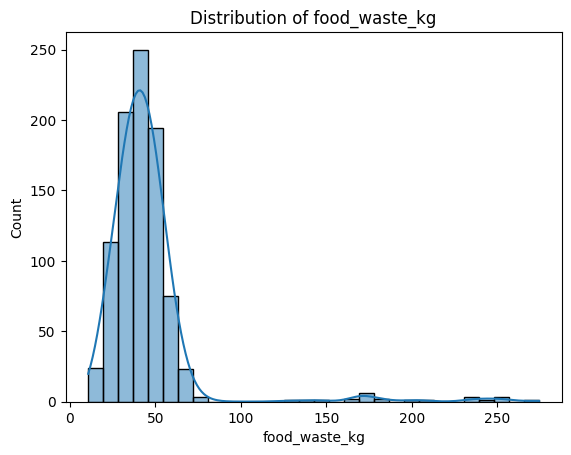

In [14]:
sns.histplot(df_train["food_waste_kg"], bins = 30, kde = True)
plt.title("Distribution of food_waste_kg")
plt.show()

Correlation Analysis

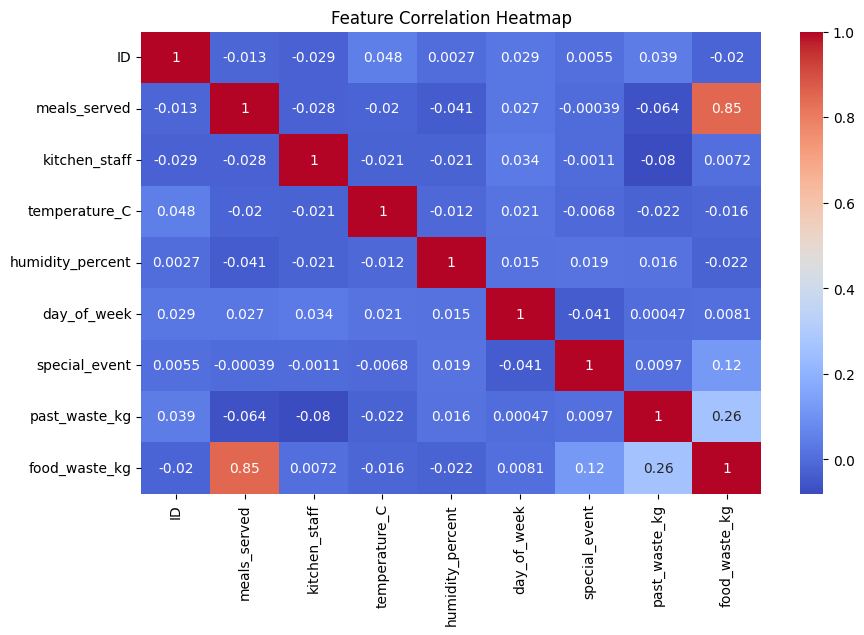

In [27]:
corr = df_train.corr(numeric_only = True)

plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Insight: meals_served is the strongest predictor of target

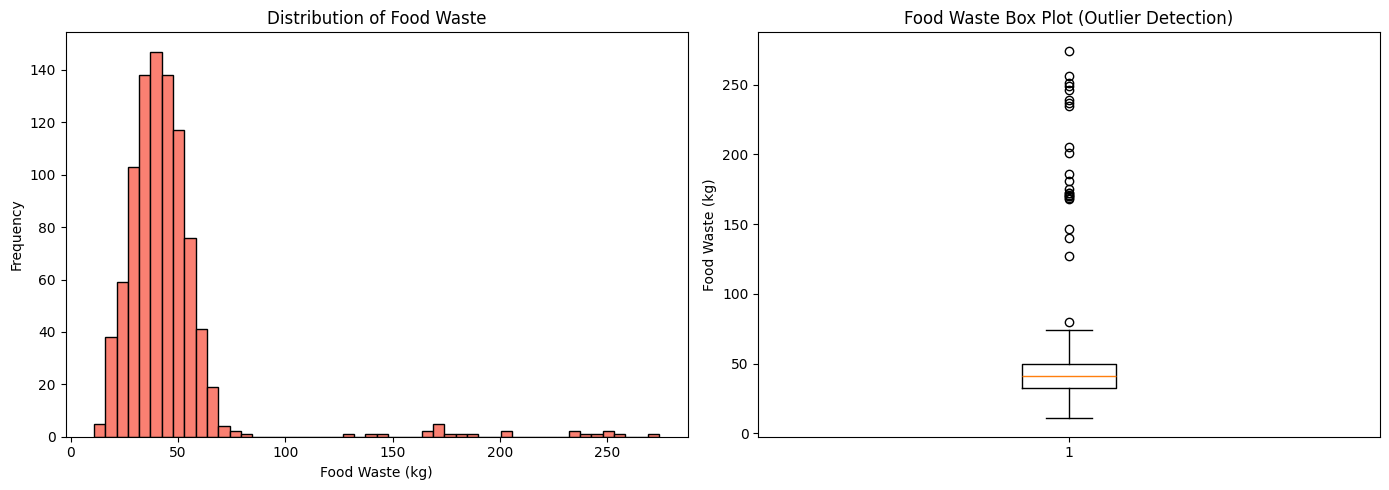


📊 Food Waste Statistics:
Mean: 44.84 kg
Median: 41.15 kg
Std Dev: 27.93 kg
Min: 10.82 kg
Max: 274.33 kg


In [52]:
# Food waste distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_train['food_waste_kg'], bins=50, color='salmon', edgecolor='black')
axes[0].set_xlabel('Food Waste (kg)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Food Waste')

# Box plot
axes[1].boxplot(df_train['food_waste_kg'])
axes[1].set_ylabel('Food Waste (kg)')
axes[1].set_title('Food Waste Box Plot (Outlier Detection)')

plt.tight_layout()
plt.show()

# Statistics
print("\n📊 Food Waste Statistics:")
print(f"Mean: {df_train['food_waste_kg'].mean():.2f} kg")
print(f"Median: {df_train['food_waste_kg'].median():.2f} kg")
print(f"Std Dev: {df_train['food_waste_kg'].std():.2f} kg")
print(f"Min: {df_train['food_waste_kg'].min():.2f} kg")
print(f"Max: {df_train['food_waste_kg'].max():.2f} kg")

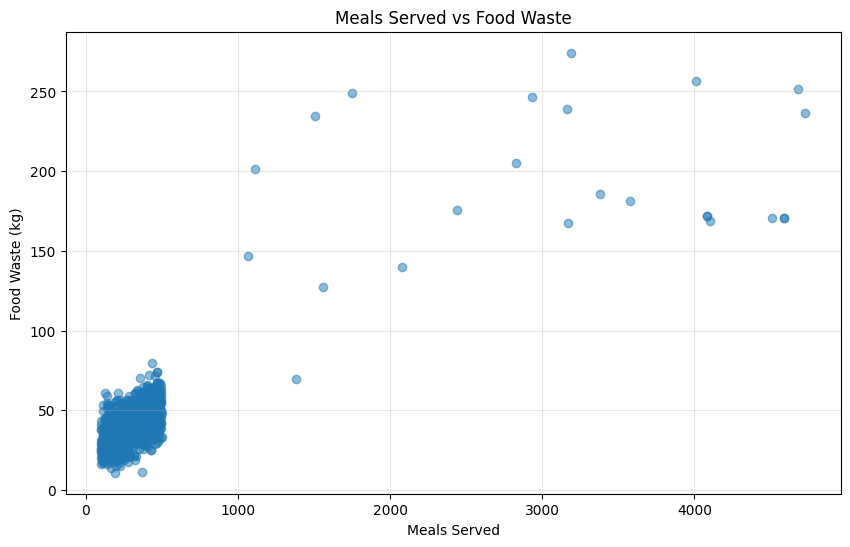

Correlation: 0.852


In [58]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_train['meals_served'], df_train['food_waste_kg'], alpha=0.5)
plt.xlabel('Meals Served')
plt.ylabel('Food Waste (kg)')
plt.title('Meals Served vs Food Waste')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation
corr = df_train['meals_served'].corr(df_train['food_waste_kg'])
print(f"Correlation: {corr:.3f}")

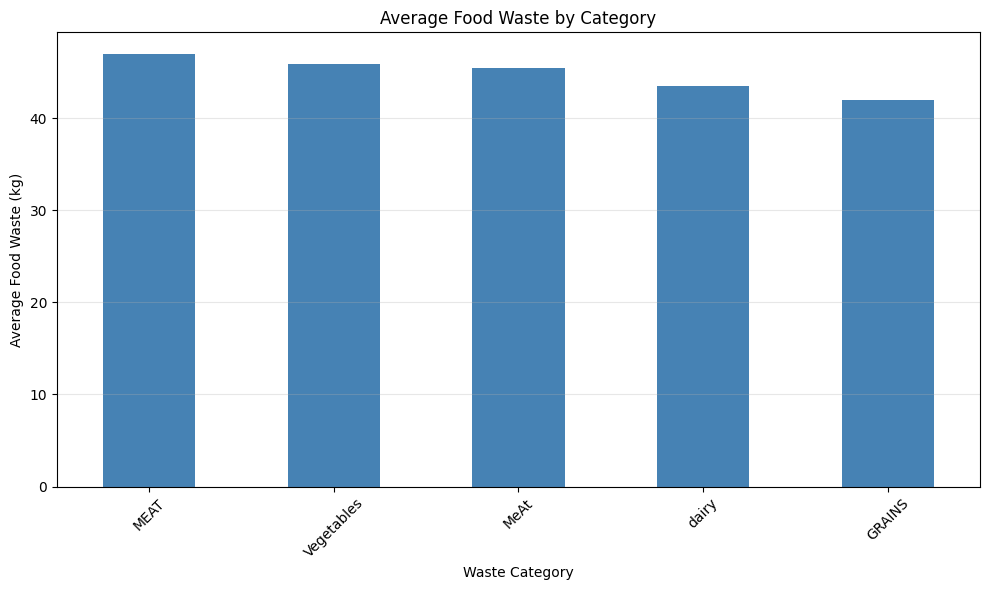

,mean,count
waste_category,,
MEAT,46.988388,210
Vegetables,45.853093,176
MeAt,45.454874,169
dairy,43.555220,180
GRAINS,42.000976,176


In [60]:
# Average waste by category
waste_by_category = df_train.groupby('waste_category')['food_waste_kg'].agg(['mean', 'count'])
waste_by_category = waste_by_category.sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))
waste_by_category['mean'].plot(kind='bar', color='steelblue')
plt.xlabel('Waste Category')
plt.ylabel('Average Food Waste (kg)')
plt.title('Average Food Waste by Category')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

waste_by_category

# Insights:
1. Columns to drop : ID, date

### Key EDA Findings:

1. **Target Variable (food_waste_kg):**
   - Range: [min] to [max] kg
   - Distribution: [normal/skewed/has outliers]
   - Notable: [any patterns]

2. **Main Predictors:**
   - meals_served: [correlation value]
   - past_waste_kg: [correlation value]
   - Special events: [increases/decreases waste by X%]

3. **Data Quality Issues:**
   - Missing values in staff_experience: X%
   - Categorical inconsistencies: [list them]
   - Outliers in: [which columns]

4. **Feature Engineering Opportunities:**
   - [ ] Fix categorical inconsistencies
   - [ ] Handle missing values in staff_experience
   - [ ] Create waste_per_meal ratio
   - [ ] Extract date features (month, quarter)
   - [ ] Flag extreme meal counts